## 考慮背景知識後的OLS

In [160]:
import pandas as pd
import statsmodels.api as sm

# 加载数据
data = pd.read_csv('Movie.csv')

# 清理列名中的空格
data.columns = data.columns.str.strip()

data['CSP'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(3, 6))).astype(int)
data['SD'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(4, 6))).astype(int)
data['SpecialCondition'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(1, 4))).astype(int)
data['Drama_Comedy'] = ((data['Class_Darma'] == 1) & (data['Class_Comedy'] == 1)).astype(int)
data['Action_Comedy'] = ((data['Class_Action'] == 1) & (data['Class_Comedy'] == 1)).astype(int)



In [161]:
# 日期範圍
typhoon_dates = [
    ('2017-07-01', '2017-07-05'),
    ('2018-07-23', '2018-07-27'),
    ('2019-08-06', '2019-08-10'),
    ('2020-07-31', '2020-08-04'),
    ('2021-08-19', '2021-08-23'),
    ('2022-07-01', '2022-07-05')
]

earthquake_dates = [
    ('2018-02-06', '2018-02-08'),
    ('2019-04-18', '2019-04-20'),
    ('2020-02-26', '2020-02-28'),
    ('2021-10-24', '2021-10-26')
]

# 設置變數
def in_dates(row, date_ranges):
    play_date = f"{int(row['PlayYear'])}-{int(row['PlayMonth']):02d}-{int(row['PlayWeek']):02d}"
    for start, end in date_ranges:
        if start <= play_date <= end:
            return 1
    return 0

data['Typhoon'] = data.apply(lambda row: in_dates(row, typhoon_dates), axis=1)
data['Earthquake'] = data.apply(lambda row: in_dates(row, earthquake_dates), axis=1)


In [162]:
import pandas as pd

# 假設我們已經加載了數據到data中
# 設置CSP, SD, SpecialCondition, Drama_Comedy, Action_Comedy變數
data['CSP'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(3, 6))).astype(int)
data['SD'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(4, 6))).astype(int)
data['SpecialCondition'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(1, 4))).astype(int)
data['Drama_Comedy'] = ((data['Class_Darma'] == 1) & (data['Class_Comedy'] == 1)).astype(int)
data['Action_Comedy'] = ((data['Class_Action'] == 1) & (data['Class_Comedy'] == 1)).astype(int)

# 設置颱風和地震變數
typhoon_dates = [
    ('2017-07-01', '2017-07-05'),
    ('2018-07-23', '2018-07-27'),
    ('2019-08-06', '2019-08-10'),
    ('2020-07-31', '2020-08-04'),
    ('2021-08-19', '2021-08-23'),
    ('2022-07-01', '2022-07-05')
]

earthquake_dates = [
    ('2018-02-06', '2018-02-08'),
    ('2019-04-18', '2019-04-20'),
    ('2020-02-26', '2020-02-28'),
    ('2021-10-24', '2021-10-26')
]

policy_dates = [
    ('2017-01-01', '2017-12-31'),
    ('2018-01-01', '2018-12-31'),
    ('2019-01-01', '2019-12-31'),
    ('2020-01-01', '2020-12-31'),
    ('2021-01-01', '2021-12-31'),
    ('2022-01-01', '2022-12-31')
]

festival_dates = [
    ('2017-12-25', '2017-12-31'),
    ('2018-12-25', '2018-12-31'),
    ('2019-12-25', '2019-12-31'),
    ('2020-12-25', '2020-12-31'),
    ('2021-12-25', '2021-12-31'),
    ('2022-12-25', '2022-12-31')
]

promotion_dates = [
    ('2017-07-01', '2017-07-31'),
    ('2018-07-01', '2018-07-31'),
    ('2019-07-01', '2019-07-31'),
    ('2020-07-01', '2020-07-31'),
    ('2021-07-01', '2021-07-31'),
    ('2022-07-01', '2022-07-31')
]

pandemic_dates = [
    ('2020-01-21', '2020-12-31'),
    ('2021-01-01', '2021-12-31'),
    ('2022-01-01', '2022-12-31')
]

def in_dates(row, date_ranges):
    play_date = f"{int(row['PlayYear'])}-{int(row['PlayMonth']):02d}-{int(row['PlayWeek']):02d}"
    for start, end in date_ranges:
        if start <= play_date <= end:
            return 1
    return 0

data['Typhoon'] = data.apply(lambda row: in_dates(row, typhoon_dates), axis=1)
data['Earthquake'] = data.apply(lambda row: in_dates(row, earthquake_dates), axis=1)
data['Policy'] = data.apply(lambda row: in_dates(row, policy_dates), axis=1)
data['Festival'] = data.apply(lambda row: in_dates(row, festival_dates), axis=1)
data['Promotion'] = data.apply(lambda row: in_dates(row, promotion_dates), axis=1)
data['Pandemic'] = data.apply(lambda row: in_dates(row, pandemic_dates), axis=1)

# 確認所有變數設置正確
print(data[['CSP', 'SD', 'SpecialCondition', 'Drama_Comedy', 'Action_Comedy', 'Typhoon', 'Earthquake', 'Policy', 'Festival', 'Promotion', 'Pandemic']].head())

# CSP: 大型集會和梅花座實施期間
# SD: 保持社交距離期間
# SpecialCondition: 疫情高峰期間
# Drama_Comedy: 劇情喜劇類型
# Action_Comedy: 動作喜劇類型
# Typhoon: 颱風影響
# Earthquake: 地震影響
# Policy: 政策影響期間
# Festival: 節日影響期間
# Promotion: 促銷活動期間
# Pandemic: 疫情影響期間


   CSP  SD  SpecialCondition  Drama_Comedy  Action_Comedy  Typhoon  \
0    0   0                 0             0              0        0   
1    0   0                 0             0              0        0   
2    0   0                 0             0              0        0   
3    0   0                 0             0              0        0   
4    0   0                 0             0              0        0   

   Earthquake  Policy  Festival  Promotion  Pandemic  
0           0       1         0          0         0  
1           0       1         0          0         0  
2           0       1         0          0         0  
3           0       1         0          0         0  
4           0       1         0          0         0  


In [163]:
import numpy as np
# 確保數據框中有 Audience 變數

if 'Audience' not in data.columns:
    raise KeyError("數據框中缺少 'Audience' 變數。")

# 創建 Log_Audience 變數
data['Log_Audience'] = data['Audience'].apply(lambda x: np.log(x + 1))  # 避免 log(0)

# 確認變數創建成功
print(data[['Audience', 'Log_Audience']].head())


   Audience  Log_Audience
0        79      4.382027
1        50      3.931826
2        44      3.806662
3         4      1.609438
4        32      3.496508


In [164]:
import statsmodels.api as sm

# 確認我們的數據中包含所有需要的變數
features = ['Tempture', 'Rainfall', 'Play_nWeek', 'Weekend', 'Director_Award', 'Producer_Famous',
            'Budget', 'Actor_Awardall', 'IMDb_rating', 'Oscar_Nom', 'Cannes_Nom', 'GHA_Nom', 
            'GHA_AwardTotal', 'TFF_Nom', 'TFF_AwardTotal', 'lnsubsidy', 'CSP', 'SD', 'SpecialCondition', 
            'Drama_Comedy', 'Action_Comedy', 'Typhoon', 'Earthquake', 'Policy', 'Festival', 'Promotion', 
            'Pandemic']

X = data[features]
y = data['Log_Audience']

# 添加常數項
X = sm.add_constant(X)

# 構建模型
model = sm.OLS(y, X).fit()

# 輸出模型結果
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Log_Audience   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     449.0
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:46:44   Log-Likelihood:            -1.3074e+05
No. Observations:               74232   AIC:                         2.615e+05
Df Residuals:                   74206   BIC:                         2.618e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Tempture             0.0117      0.000  

In [165]:
import pandas as pd
import statsmodels.api as sm


# 確保沒有重複的列
data = data.loc[:, ~data.columns.duplicated()]

# 創建Season變數
data['Season'] = data['PlayMonth'].apply(lambda x: 'Spring' if x in [3, 4, 5] else
                                                   ('Summer' if x in [6, 7, 8] else
                                                    ('Autumn' if x in [9, 10, 11] else 'Winter')))

# 將Season變數轉換為虛擬變數
data = pd.get_dummies(data, columns=['Season'], drop_first=True)

# 確認存在的虛擬變數列
print(data.columns)

# 設置新的變數（不包括Season_Autumn）
data['Temp_Spring'] = data['Tempture'] * data['Season_Spring']
data['Temp_Summer'] = data['Tempture'] * data['Season_Summer']
data['Temp_Winter'] = data['Tempture'] * data['Season_Winter']
data['Rain_Spring'] = data['Rainfall'] * data['Season_Spring']
data['Rain_Summer'] = data['Rainfall'] * data['Season_Summer']
data['Rain_Winter'] = data['Rainfall'] * data['Season_Winter']

# 確保所有變數存在於數據中
variables = [
    'Audience', 'Tempture', 'Rainfall', 'Play_nWeek', 'Weekend', 
    'Director_Award', 'Producer_Famous', 'Budget', 'Actor_Awardall', 
    'IMDb_rating', 'Oscar_Nom', 'Cannes_Nom', 'GHA_Nom', 'GHA_AwardTotal', 
    'TFF_Nom', 'TFF_AwardTotal', 'lnsubsidy', 'CSP', 'SD', 'SpecialCondition', 
    'Drama_Comedy', 'Action_Comedy', 'Typhoon', 'Earthquake', 'Policy', 
    'Festival', 'Promotion', 'Pandemic', 'Temp_Spring', 'Temp_Summer', 
    'Temp_Winter', 'Rain_Spring', 'Rain_Summer', 'Rain_Winter'
]

# 過濾數據以確保所有變數存在
data = data.loc[:, variables]

# 設置特徵和目標變數
X = data.drop(columns=['Audience'])
y = data['Audience']

# 將觀眾數量轉換為對數形式
y = y.apply(lambda x: np.log(x) if x > 0 else 0)

# 添加常數項
X = sm.add_constant(X)

# 訓練OLS模型
model = sm.OLS(y, X).fit()

# 輸出結果
print(model.summary())


Index(['PlayID', 'MovieID', 'PlayWeek', 'Weekend', 'Play_nWeek', 'PlayMonth',
       'PlayYear', 'ViewDay', 'CutBack', 'GHA_View_Code',
       ...
       'Typhoon', 'Earthquake', 'Policy', 'Festival', 'Promotion', 'Pandemic',
       'Log_Audience', 'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object', length=102)
                            OLS Regression Results                            
Dep. Variable:               Audience   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     369.3
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:46:45   Log-Likelihood:            -1.3487e+05
No. Observations:               74232   AIC:                         2.698e+05
Df Residuals:                   74200   BIC:                         2.701e+05
Df Model:                        

In [205]:
print(data.columns)


Index(['Tempture', 'Rainfall', 'Play_nWeek', 'Weekend', 'Audience',
       'Director_Award', 'Producer_Famous', 'Budget', 'Actor_Awardall',
       'IMDb_rating', 'Oscar_Nom', 'Cannes_Nom', 'GHA_Nom', 'GHA_AwardTotal',
       'TFF_Nom', 'TFF_AwardTotal', 'lnsubsidy', 'CSP', 'SD',
       'SpecialCondition', 'Drama_Comedy', 'Action_Comedy', 'Typhoon',
       'Earthquake', 'Policy', 'Festival', 'Promotion', 'Pandemic',
       'Temp_Spring', 'Temp_Summer', 'Temp_Winter', 'Rain_Spring',
       'Rain_Summer', 'Rain_Winter', 'PlayYear', 'No_Movie_Length',
       'No_Budget', 'No_IMDb', 'No_Oscar', 'Class_#N/A', 'No_Cannes', 'No_GHA',
       'No_TFF', 'TFF_NomData', 'No_Weather', 'Subsidy_Yes', 'Log_Audience'],
      dtype='object')


In [216]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# 加載數據
data = pd.read_csv('Movie.csv')

# 清理列名中的空格
data.columns = data.columns.str.strip()

# 檢查並創建 PlayYear 列
if 'PlayYear' not in data.columns:
    if 'PlayDate' in data.columns:
        data['PlayYear'] = pd.to_datetime(data['PlayDate']).dt.year
    elif 'PlayWeek' in data.columns:
        data['PlayYear'] = data['PlayWeek'].astype(str).str[:4].astype(int)
    else:
        raise KeyError("數據中缺少 'PlayYear' 和 'PlayWeek' 列，無法生成 'PlayYear'")

# 檢查是否有 PlayMonth 列
if 'PlayMonth' not in data.columns:
    raise KeyError("數據中缺少 'PlayMonth' 列，無法生成 'PlayMonth'")

# 創建所需的變數
data['CSP'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(3, 6))).astype(int)
data['SD'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(4, 6))).astype(int)
data['SpecialCondition'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(1, 4))).astype(int)
data['Drama_Comedy'] = ((data['Class_Darma'] == 1) & (data['Class_Comedy'] == 1)).astype(int)
data['Action_Comedy'] = ((data['Class_Action'] == 1) & (data['Class_Comedy'] == 1)).astype(int)

# 日期範圍
typhoon_dates = [
    ('2017-07-01', '2017-07-05'),
    ('2018-07-23', '2018-07-27'),
    ('2019-08-06', '2019-08-10'),
    ('2020-07-31', '2020-08-04'),
    ('2021-08-19', '2021-08-23'),
    ('2022-07-01', '2022-07-05')
]

earthquake_dates = [
    ('2018-02-06', '2018-02-08'),
    ('2019-04-18', '2019-04-20'),
    ('2020-02-26', '2020-02-28'),
    ('2021-10-24', '2021-10-26')
]

policy_dates = [
    ('2017-01-01', '2017-12-31'),
    ('2018-01-01', '2018-12-31'),
    ('2019-01-01', '2019-12-31'),
    ('2020-01-01', '2020-12-31'),
    ('2021-01-01', '2021-12-31'),
    ('2022-01-01', '2022-12-31')
]

festival_dates = [
    ('2017-01-01', '2017-02-28'),  # Includes Spring Festival and New Year
    ('2017-04-01', '2017-04-04'),  # Qingming Festival
    ('2017-06-01', '2017-06-30'),  # Dragon Boat Festival
    ('2017-07-01', '2017-08-31'),  # Summer vacation
    ('2017-09-01', '2017-10-10'),  # Mid-Autumn Festival and National Day
    ('2017-12-25', '2017-12-31'),  # Christmas and New Year
    ('2018-01-01', '2018-02-28'),
    ('2018-04-01', '2018-04-04'),
    ('2018-06-01', '2018-06-30'),
    ('2018-07-01', '2018-08-31'),
    ('2018-09-01', '2018-10-10'),
    ('2018-12-25', '2018-12-31'),
    ('2019-01-01', '2019-02-28'),
    ('2019-04-01', '2019-04-04'),
    ('2019-06-01', '2019-06-30'),
    ('2019-07-01', '2019-08-31'),
    ('2019-09-01', '2019-10-10'),
    ('2019-12-25', '2019-12-31'),
    ('2020-01-01', '2020-02-28'),
    ('2020-04-01', '2020-04-04'),
    ('2020-06-01', '2020-06-30'),
    ('2020-07-01', '2020-08-31'),
    ('2020-09-01', '2020-10-10'),
    ('2020-12-25', '2020-12-31'),
    ('2021-01-01', '2021-02-28'),
    ('2021-04-01', '2021-04-04'),
    ('2021-06-01', '2021-06-30'),
    ('2021-07-01', '2021-08-31'),
    ('2021-09-01', '2021-10-10'),
    ('2021-12-25', '2021-12-31'),
    ('2022-01-01', '2022-02-28'),
    ('2022-04-01', '2022-04-04'),
    ('2022-06-01', '2022-06-30'),
    ('2022-07-01', '2022-08-31'),
    ('2022-09-01', '2022-10-10'),
    ('2022-12-25', '2022-12-31')
]

promotion_dates = [
    ('2017-07-01', '2017-07-31'),
    ('2018-07-01', '2018-07-31'),
    ('2019-07-01', '2019-07-31'),
    ('2020-07-01', '2020-07-31'),
    ('2021-07-01', '2021-07-31'),
    ('2022-07-01', '2022-07-31')
]

pandemic_dates = [
    ('2020-01-21', '2020-12-31'),
    ('2021-01-01', '2021-12-31'),
    ('2022-01-01', '2022-12-31')
]

def in_dates(row, date_ranges):
    play_date = f"{int(row['PlayYear'])}-{int(row['PlayMonth']):02d}-01"
    for start, end in date_ranges:
        if start <= play_date <= end:
            return 1
    return 0

data['Typhoon'] = data.apply(lambda row: in_dates(row, typhoon_dates), axis=1)
data['Earthquake'] = data.apply(lambda row: in_dates(row, earthquake_dates), axis=1)
data['Policy'] = data.apply(lambda row: in_dates(row, policy_dates), axis=1)
data['Festival'] = data.apply(lambda row: in_dates(row, festival_dates), axis=1)
data['Promotion'] = data.apply(lambda row: in_dates(row, promotion_dates), axis=1)
data['Pandemic'] = data.apply(lambda row: in_dates(row, pandemic_dates), axis=1)

# 創建Season變數
data['Season'] = data['PlayMonth'].apply(lambda x: 'Spring' if x in [3, 4, 5] else
                                                   ('Summer' if x in [6, 7, 8] else
                                                    ('Autumn' if x in [9, 10, 11] else 'Winter')))

# 將Season變數轉換為虛擬變數
data = pd.get_dummies(data, columns=['Season'], drop_first=True)

# 設置新的變數
data['Temp_Spring'] = data['Tempture'] * data['Season_Spring']
data['Temp_Summer'] = data['Tempture'] * data['Season_Summer']
data['Temp_Winter'] = data['Tempture'] * data['Season_Winter']
data['Rain_Spring'] = data['Rainfall'] * data['Season_Spring']
data['Rain_Summer'] = data['Rainfall'] * data['Season_Summer']
data['Rain_Winter'] = data['Rainfall'] * data['Season_Winter']

# 確保所有變數存在於數據中
variables = [
    'Tempture', 'Rainfall', 'Play_nWeek', 'Weekend', 'Audience', 'lnbudget',
    'Director_Award', 'Producer_Famous', 'Actor_Awardall', 
    'IMDb_rating', 'GHA_Nom', 'GHA_AwardTotal', 
    'TFF_Nom', 'TFF_AwardTotal', 'lnsubsidy', 'CSP', 'SD', 'SpecialCondition', 
    'Drama_Comedy', 'Action_Comedy', 'Typhoon', 'Earthquake', 'Policy', 
    'Festival', 'Promotion', 'Pandemic', 'Temp_Spring', 'Temp_Summer', 
    'Temp_Winter', 'Rain_Spring', 'Rain_Summer', 'Rain_Winter', 'PlayYear',
    'No_Movie_Length', 'No_Budget', 'No_IMDb', 'Class_#N/A',
    'No_GHA', 'No_TFF', 'TFF_NomData', 'No_Weather', 'Subsidy_Yes'
]

# 過濾數據以確保所有變數存在
data = data.loc[:, variables]

# 創建 Log_Audience 變數
data['Log_Audience'] = data['Audience'].apply(lambda x: np.log(x + 1))  # 避免 log(0)

# 創建交互項
data['lnbudget:No_Budget'] = data['lnbudget'] * data['No_Budget']
data['Subsidy_Yes:lnsubsidy'] = data['Subsidy_Yes'] * data['lnsubsidy']
data['Subsidy_Yes:IMDb_rating'] = data['Subsidy_Yes'] * data['IMDb_rating']
data['Subsidy_Yes:GHA_Nom'] = data['Subsidy_Yes'] * data['GHA_Nom']
data['Subsidy_Yes:GHA_AwardTotal'] = data['Subsidy_Yes'] * data['GHA_AwardTotal']
data['Subsidy_Yes:TFF_Nom'] = data['Subsidy_Yes'] * data['TFF_Nom']
data['Subsidy_Yes:TFF_AwardTotal'] = data['Subsidy_Yes'] * data['TFF_AwardTotal']

# 確認變數創建成功
print(data[['Log_Audience', 'PlayYear']].head())

# 設置特徵和目標變數
X = data.drop(columns=['Log_Audience', 'Audience'])
y = data['Log_Audience']

# 添加常數項
X = sm.add_constant(X)

# 訓練OLS模型
model = sm.OLS(y, X).fit()

# 輸出結果
print(model.summary())




   Log_Audience  PlayYear
0      4.382027      2017
1      3.931826      2017
2      3.806662      2017
3      1.609438      2017
4      3.496508      2017
                            OLS Regression Results                            
Dep. Variable:           Log_Audience   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     339.5
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:01:07   Log-Likelihood:            -1.2930e+05
No. Observations:               74232   AIC:                         2.587e+05
Df Residuals:                   74188   BIC:                         2.591e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                 coef    std err      

In [222]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# 加載數據
data = pd.read_csv('Movie.csv')

# 清理列名中的空格
data.columns = data.columns.str.strip()

# 檢查並創建 PlayYear 列
if 'PlayYear' not in data.columns:
    if 'PlayDate' in data.columns:
        data['PlayYear'] = pd.to_datetime(data['PlayDate']).dt.year
    elif 'PlayWeek' in data.columns:
        data['PlayYear'] = data['PlayWeek'].astype(str).str[:4].astype(int)
    else:
        raise KeyError("數據中缺少 'PlayYear' 和 'PlayWeek' 列，無法生成 'PlayYear'")

# 檢查是否有 PlayMonth 列
if 'PlayMonth' not in data.columns:
    raise KeyError("數據中缺少 'PlayMonth' 列，無法生成 'PlayMonth'")

# 創建所需的變數
data['CSP'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(3, 6))).astype(int)
data['SD'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(4, 6))).astype(int)
data['SpecialCondition'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(1, 4))).astype(int)
data['Drama_Comedy'] = ((data['Class_Darma'] == 1) & (data['Class_Comedy'] == 1)).astype(int)
data['Action_Comedy'] = ((data['Class_Action'] == 1) & (data['Class_Comedy'] == 1)).astype(int)

# 日期範圍
typhoon_dates = [
    ('2017-07-01', '2017-07-05'),
    ('2018-07-23', '2018-07-27'),
    ('2019-08-06', '2019-08-10'),
    ('2020-07-31', '2020-08-04'),
    ('2021-08-19', '2021-08-23'),
    ('2022-07-01', '2022-07-05')
]

earthquake_dates = [
    ('2018-02-06', '2018-02-08'),
    ('2019-04-18', '2019-04-20'),
    ('2020-02-26', '2020-02-28'),
    ('2021-10-24', '2021-10-26')
]

policy_dates = [
    ('2017-01-01', '2017-12-31'),
    ('2018-01-01', '2018-12-31'),
    ('2019-01-01', '2019-12-31'),
    ('2020-01-01', '2020-12-31'),
    ('2021-01-01', '2021-12-31'),
    ('2022-01-01', '2022-12-31')
]

festival_dates = [
    ('2017-01-01', '2017-02-28'),  # Includes Spring Festival and New Year
    ('2017-04-01', '2017-04-04'),  # Qingming Festival
    ('2017-06-01', '2017-06-30'),  # Dragon Boat Festival
    ('2017-07-01', '2017-08-31'),  # Summer vacation
    ('2017-09-01', '2017-10-10'),  # Mid-Autumn Festival and National Day
    ('2017-12-25', '2017-12-31'),  # Christmas and New Year
    ('2018-01-01', '2018-02-28'),
    ('2018-04-01', '2018-04-04'),
    ('2018-06-01', '2018-06-30'),
    ('2018-07-01', '2018-08-31'),
    ('2018-09-01', '2018-10-10'),
    ('2018-12-25', '2018-12-31'),
    ('2019-01-01', '2019-02-28'),
    ('2019-04-01', '2019-04-04'),
    ('2019-06-01', '2019-06-30'),
    ('2019-07-01', '2019-08-31'),
    ('2019-09-01', '2019-10-10'),
    ('2019-12-25', '2019-12-31'),
    ('2020-01-01', '2020-02-28'),
    ('2020-04-01', '2020-04-04'),
    ('2020-06-01', '2020-06-30'),
    ('2020-07-01', '2020-08-31'),
    ('2020-09-01', '2020-10-10'),
    ('2020-12-25', '2020-12-31'),
    ('2021-01-01', '2021-02-28'),
    ('2021-04-01', '2021-04-04'),
    ('2021-06-01', '2021-06-30'),
    ('2021-07-01', '2021-08-31'),
    ('2021-09-01', '2021-10-10'),
    ('2021-12-25', '2021-12-31'),
    ('2022-01-01', '2022-02-28'),
    ('2022-04-01', '2022-04-04'),
    ('2022-06-01', '2022-06-30'),
    ('2022-07-01', '2022-08-31'),
    ('2022-09-01', '2022-10-10'),
    ('2022-12-25', '2022-12-31')
]

promotion_dates = [
    ('2017-07-01', '2017-07-31'),
    ('2018-07-01', '2018-07-31'),
    ('2019-07-01', '2019-07-31'),
    ('2020-07-01', '2020-07-31'),
    ('2021-07-01', '2021-07-31'),
    ('2022-07-01', '2022-07-31')
]

pandemic_dates = [
    ('2020-01-21', '2020-12-31'),
    ('2021-01-01', '2021-12-31'),
    ('2022-01-01', '2022-12-31')
]

def in_dates(row, date_ranges):
    play_date = f"{int(row['PlayYear'])}-{int(row['PlayMonth']):02d}-01"
    for start, end in date_ranges:
        if start <= play_date <= end:
            return 1
    return 0

data['Typhoon'] = data.apply(lambda row: in_dates(row, typhoon_dates), axis=1)
data['Earthquake'] = data.apply(lambda row: in_dates(row, earthquake_dates), axis=1)
data['Policy'] = data.apply(lambda row: in_dates(row, policy_dates), axis=1)
data['Festival'] = data.apply(lambda row: in_dates(row, festival_dates), axis=1)
data['Promotion'] = data.apply(lambda row: in_dates(row, promotion_dates), axis=1)
data['Pandemic'] = data.apply(lambda row: in_dates(row, pandemic_dates), axis=1)

# 創建Season變數
data['Season'] = data['PlayMonth'].apply(lambda x: 'Spring' if x in [3, 4, 5] else
                                                   ('Summer' if x in [6, 7, 8] else
                                                    ('Autumn' if x in [9, 10, 11] else 'Winter')))

# 將Season變數轉換為虛擬變數
data = pd.get_dummies(data, columns=['Season'], drop_first=True)

# 設置新的變數
data['Temp_Spring'] = data['Tempture'] * data['Season_Spring']
data['Temp_Summer'] = data['Tempture'] * data['Season_Summer']
data['Temp_Winter'] = data['Tempture'] * data['Season_Winter']
data['Rain_Spring'] = data['Rainfall'] * data['Season_Spring']
data['Rain_Summer'] = data['Rainfall'] * data['Season_Summer']
data['Rain_Winter'] = data['Rainfall'] * data['Season_Winter']

# 重新命名變數
data = data.rename(columns={'Class_#N/A': 'Class_NA'})


# 確保所有變數存在於數據中
variables = [
    'Tempture', 'Rainfall', 'Play_nWeek', 'Weekend', 'Audience', 'lnbudget',
    'Director_Award', 'Producer_Famous', 'Actor_Awardall', 'IMDb_rating', 
    'GHA_Nom', 'GHA_AwardTotal', 'TFF_Nom', 'TFF_AwardTotal', 'lnsubsidy', 
    'CSP', 'SD', 'SpecialCondition', 'Drama_Comedy', 'Action_Comedy', 
    'Typhoon', 'Earthquake', 'Policy', 'Festival', 'Promotion', 'Pandemic', 
    'Temp_Spring', 'Temp_Summer', 'Temp_Winter', 'Rain_Spring', 'Rain_Summer', 
    'Rain_Winter', 'PlayYear', 'No_Movie_Length', 'No_Budget', 'No_IMDb', 
    'Class_NA', 'No_GHA', 'No_TFF', 'TFF_NomData', 'No_Weather', 'Subsidy_Yes'
]

# 過濾數據以確保所有變數存在
data = data.loc[:, variables]

# 创建 Log_Audience 变量
data['Log_Audience'] = data['Audience'].apply(lambda x: np.log(x + 1))  # 避免 log(0)

# 创建交互项
data['Subsidy_Yes:lnbudget'] = data['Subsidy_Yes'] * data['lnbudget']
data['Subsidy_Yes:lnsubsidy'] = data['Subsidy_Yes'] * data['lnsubsidy']
data['No_Budget:lnbudget'] = data['No_Budget'] * data['lnbudget']
data['No_IMDb:IMDb_rating'] = data['No_IMDb'] * data['IMDb_rating']
data['No_GHA:GHA_Nom'] = data['No_GHA'] * data['GHA_Nom']
data['No_GHA:GHA_AwardTotal'] = data['No_GHA'] * data['GHA_AwardTotal']
data['No_TFF:TFF_Nom'] = data['No_TFF'] * data['TFF_Nom']
data['No_TFF:TFF_AwardTotal'] = data['No_TFF'] * data['TFF_AwardTotal']

# 确认变量创建成功
print(data[['Log_Audience', 'PlayYear']].head())

# 设置特征和目标变量
X = data.drop(columns=['Log_Audience', 'Audience'])
y = data['Log_Audience']

# 添加常数项
X = sm.add_constant(X)

# 训练OLS模型
model = sm.OLS(y, X).fit()

# 输出结果
print(model.summary())

# 训练分量回归模型
quantiles = [0.25, 0.5, 0.75]
quantile_models = {}
for q in quantiles:
    quantile_models[q] = smf.quantreg('Log_Audience ~ ' + ' + '.join(X.columns[1:]), data).fit(q=q)

# 输出分量回归模型结果
for q in quantiles:
    print(f'Quantile: {q}')
    print(quantile_models[q].summary())


   Log_Audience  PlayYear
0      4.382027      2017
1      3.931826      2017
2      3.806662      2017
3      1.609438      2017
4      3.496508      2017
                            OLS Regression Results                            
Dep. Variable:           Log_Audience   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     358.8
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:32:23   Log-Likelihood:            -1.2955e+05
No. Observations:               74232   AIC:                         2.592e+05
Df Residuals:                   74192   BIC:                         2.596e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Quantile: 0.25
                         QuantReg Regression Results                          
Dep. Variable:           Log_Audience   Pseudo R-squared:              0.08585
Model:                       QuantReg   Bandwidth:                      0.1430
Method:                 Least Squares   Sparsity:                        4.309
Date:                Wed, 12 Jun 2024   No. Observations:                74232
Time:                        00:34:28   Df Residuals:                    74193
                                        Df Model:                           38
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               245.8987     10.264     23.958      0.000     225.782     266.015
Rainfall                 -0.0008      0.001     -1.211      0.226      -0.002       0.001
Play_nWeek               -0.0112      0.005     -2.126      0.033      -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1883: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/st

In [223]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 設置特徵和目標變數
X = data.drop(columns=['Log_Audience', 'Audience'])
y = data['Log_Audience']

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 標準化數據
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 訓練Lasso模型
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# 預測
y_pred = lasso.predict(X_test_scaled)

# 評估模型
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 2.0075896518067315
R^2 Score: 0.11598549719179074


In [224]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# 加載數據
data = pd.read_csv('Movie.csv')

# 清理列名中的空格
data.columns = data.columns.str.strip()

# 檢查並創建 PlayYear 列
if 'PlayYear' not in data.columns:
    if 'PlayDate' in data.columns:
        data['PlayYear'] = pd.to_datetime(data['PlayDate']).dt.year
    elif 'PlayWeek' in data.columns:
        data['PlayYear'] = data['PlayWeek'].astype(str).str[:4].astype(int)
    else:
        raise KeyError("數據中缺少 'PlayYear' 和 'PlayWeek' 列，無法生成 'PlayYear'")

# 檢查是否有 PlayMonth 列
if 'PlayMonth' not in data.columns:
    raise KeyError("數據中缺少 'PlayMonth' 列，無法生成 'PlayMonth'")

# 創建所需的變數
data['CSP'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(3, 6))).astype(int)
data['SD'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(4, 6))).astype(int)
data['SpecialCondition'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(1, 4))).astype(int)
data['Drama_Comedy'] = ((data['Class_Darma'] == 1) & (data['Class_Comedy'] == 1)).astype(int)
data['Action_Comedy'] = ((data['Class_Action'] == 1) & (data['Class_Comedy'] == 1)).astype(int)

# 日期範圍
typhoon_dates = [
    ('2017-07-01', '2017-07-05'),
    ('2018-07-23', '2018-07-27'),
    ('2019-08-06', '2019-08-10'),
    ('2020-07-31', '2020-08-04'),
    ('2021-08-19', '2021-08-23'),
    ('2022-07-01', '2022-07-05')
]

earthquake_dates = [
    ('2018-02-06', '2018-02-08'),
    ('2019-04-18', '2019-04-20'),
    ('2020-02-26', '2020-02-28'),
    ('2021-10-24', '2021-10-26')
]

policy_dates = [
    ('2017-01-01', '2017-12-31'),
    ('2018-01-01', '2018-12-31'),
    ('2019-01-01', '2019-12-31'),
    ('2020-01-01', '2020-12-31'),
    ('2021-01-01', '2021-12-31'),
    ('2022-01-01', '2022-12-31')
]

festival_dates = [
    ('2017-12-25', '2017-12-31'),
    ('2018-12-25', '2018-12-31'),
    ('2019-12-25', '2019-12-31'),
    ('2020-12-25', '2020-12-31'),
    ('2021-12-25', '2021-12-31'),
    ('2022-12-25', '2022-12-31')
]

promotion_dates = [
    ('2017-07-01', '2017-07-31'),
    ('2018-07-01', '2018-07-31'),
    ('2019-07-01', '2019-07-31'),
    ('2020-07-01', '2020-07-31'),
    ('2021-07-01', '2021-07-31'),
    ('2022-07-01', '2022-07-31')
]

pandemic_dates = [
    ('2020-01-21', '2020-12-31'),
    ('2021-01-01', '2021-12-31'),
    ('2022-01-01', '2022-12-31')
]

def in_dates(row, date_ranges):
    play_date = f"{int(row['PlayYear'])}-{int(row['PlayMonth']):02d}-01"
    for start, end in date_ranges:
        if start <= play_date <= end:
            return 1
    return 0

data['Typhoon'] = data.apply(lambda row: in_dates(row, typhoon_dates), axis=1)
data['Earthquake'] = data.apply(lambda row: in_dates(row, earthquake_dates), axis=1)
data['Policy'] = data.apply(lambda row: in_dates(row, policy_dates), axis=1)
data['Festival'] = data.apply(lambda row: in_dates(row, festival_dates), axis=1)
data['Promotion'] = data.apply(lambda row: in_dates(row, promotion_dates), axis=1)
data['Pandemic'] = data.apply(lambda row: in_dates(row, pandemic_dates), axis=1)

# 創建Season變數
data['Season'] = data['PlayMonth'].apply(lambda x: 'Spring' if x in [3, 4, 5] else
                                                   ('Summer' if x in [6, 7, 8] else
                                                    ('Autumn' if x in [9, 10, 11] else 'Winter')))

# 將Season變數轉換為虛擬變數
data = pd.get_dummies(data, columns=['Season'], drop_first=True)

# 設置新的變數
data['Temp_Spring'] = data['Tempture'] * data['Season_Spring']
data['Temp_Summer'] = data['Tempture'] * data['Season_Summer']
data['Temp_Winter'] = data['Tempture'] * data['Season_Winter']
data['Rain_Spring'] = data['Rainfall'] * data['Season_Spring']
data['Rain_Summer'] = data['Rainfall'] * data['Season_Summer']
data['Rain_Winter'] = data['Rainfall'] * data['Season_Winter']

# 確保所有變數存在於數據中
variables = [
    'Audience', 'Tempture', 'Rainfall', 'Play_nWeek', 'Weekend',
    'Director_Award', 'Producer_Famous', 'Budget', 'Actor_Awardall',
    'IMDb_rating', 'Oscar_Nom', 'Cannes_Nom', 'GHA_Nom', 'GHA_AwardTotal',
    'TFF_Nom', 'TFF_AwardTotal', 'lnsubsidy', 'CSP', 'SD', 'SpecialCondition',
    'Drama_Comedy', 'Action_Comedy', 'Typhoon', 'Earthquake', 'Policy',
    'Festival', 'Promotion', 'Pandemic', 'Temp_Spring', 'Temp_Summer',
    'Temp_Winter', 'Rain_Spring', 'Rain_Summer', 'Rain_Winter', 'PlayYear',
    'No_Movie_Length', 'No_Budget', 'No_IMDb', 'No_Oscar', 'Class_#N/A',
    'No_Cannes', 'No_GHA', 'No_TFF', 'TFF_NomData', 'No_Weather', 'Subsidy_Yes'
]

# 過濾數據以確保所有變數存在
data = data.loc[:, variables]

# 創建 Log_Audience 變數
data['Log_Audience'] = data['Audience'].apply(lambda x: np.log(x + 1))  # 避免 log(0)

# 確認變數創建成功
print(data[['Audience', 'Log_Audience', 'PlayYear']].head())

# 設置特徵和目標變數
X = data.drop(columns=['Log_Audience'])
y = data['Log_Audience']

# 添加常數項
X = sm.add_constant(X)

# 訓練OLS模型
model = sm.OLS(y, X).fit()

# 輸出結果
print(model.summary())

# 設置處理組和對照組
data['treatment'] = ((data['Policy'] == 1) | (data['Pandemic'] == 1)).astype(int)
data['post'] = (data['PlayYear'] >= 2020).astype(int)

## DID模型設計
did_formula = '''
    Log_Audience ~ treatment * post + Tempture + Rainfall + Weekend +
    Director_Award + Producer_Famous + Budget + Actor_Awardall + IMDb_rating +
    Oscar_Nom + Cannes_Nom + GHA_Nom + GHA_AwardTotal + TFF_Nom + TFF_AwardTotal +
    lnsubsidy + CSP + SD + SpecialCondition + Drama_Comedy + Action_Comedy +
    Typhoon + Earthquake + Policy + Festival + Promotion + Pandemic + Temp_Spring +
    Temp_Summer + Temp_Winter + Rain_Spring + Rain_Summer + Rain_Winter
'''

did_model = smf.ols(did_formula, data=data).fit()

# 輸出DID模型結果
print(did_model.summary())

   Audience  Log_Audience  PlayYear
0        79      4.382027      2017
1        50      3.931826      2017
2        44      3.806662      2017
3         4      1.609438      2017
4        32      3.496508      2017
                            OLS Regression Results                            
Dep. Variable:           Log_Audience   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1792.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:47:36   Log-Likelihood:            -1.1088e+05
No. Observations:               74232   AIC:                         2.218e+05
Df Residuals:                   74191   BIC:                         2.222e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                    

## 分割

In [189]:
# 重新命名變數
data = data.rename(columns={'Class_#N/A': 'Class_NA'})

# 定義公式，考慮主要變量之間的交乘項
formula = """
Log_Audience ~ 
    Audience + Tempture + Rainfall + Play_nWeek + Weekend + Director_Award +
    Producer_Famous + Budget + Actor_Awardall + IMDb_rating + Oscar_Nom + Cannes_Nom +
    GHA_Nom + GHA_AwardTotal + TFF_Nom + TFF_AwardTotal + lnsubsidy + CSP + SD +
    SpecialCondition + Drama_Comedy + Action_Comedy + Typhoon + Earthquake + Policy +
    Festival + Promotion + Pandemic + Temp_Spring + Temp_Summer + Temp_Winter +
    Rain_Spring + Rain_Summer + Rain_Winter + PlayYear + No_Movie_Length + No_Budget +
    No_IMDb + No_Oscar + Class_NA + No_Cannes + No_GHA + No_TFF + TFF_NomData + No_Weather +
    Subsidy_Yes +
    Policy:Pandemic + IMDb_rating:Weekend + Policy:Weekend + Pandemic:Weekend + 
    Policy:IMDb_rating + Pandemic:IMDb_rating
"""

# 訓練模型
model = smf.ols(formula, data=data).fit()

# 輸出結果
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Log_Audience   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     327.9
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:07:37   Log-Likelihood:            -1.2965e+05
No. Observations:               74232   AIC:                         2.594e+05
Df Residuals:                   74189   BIC:                         2.598e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              151.9496 

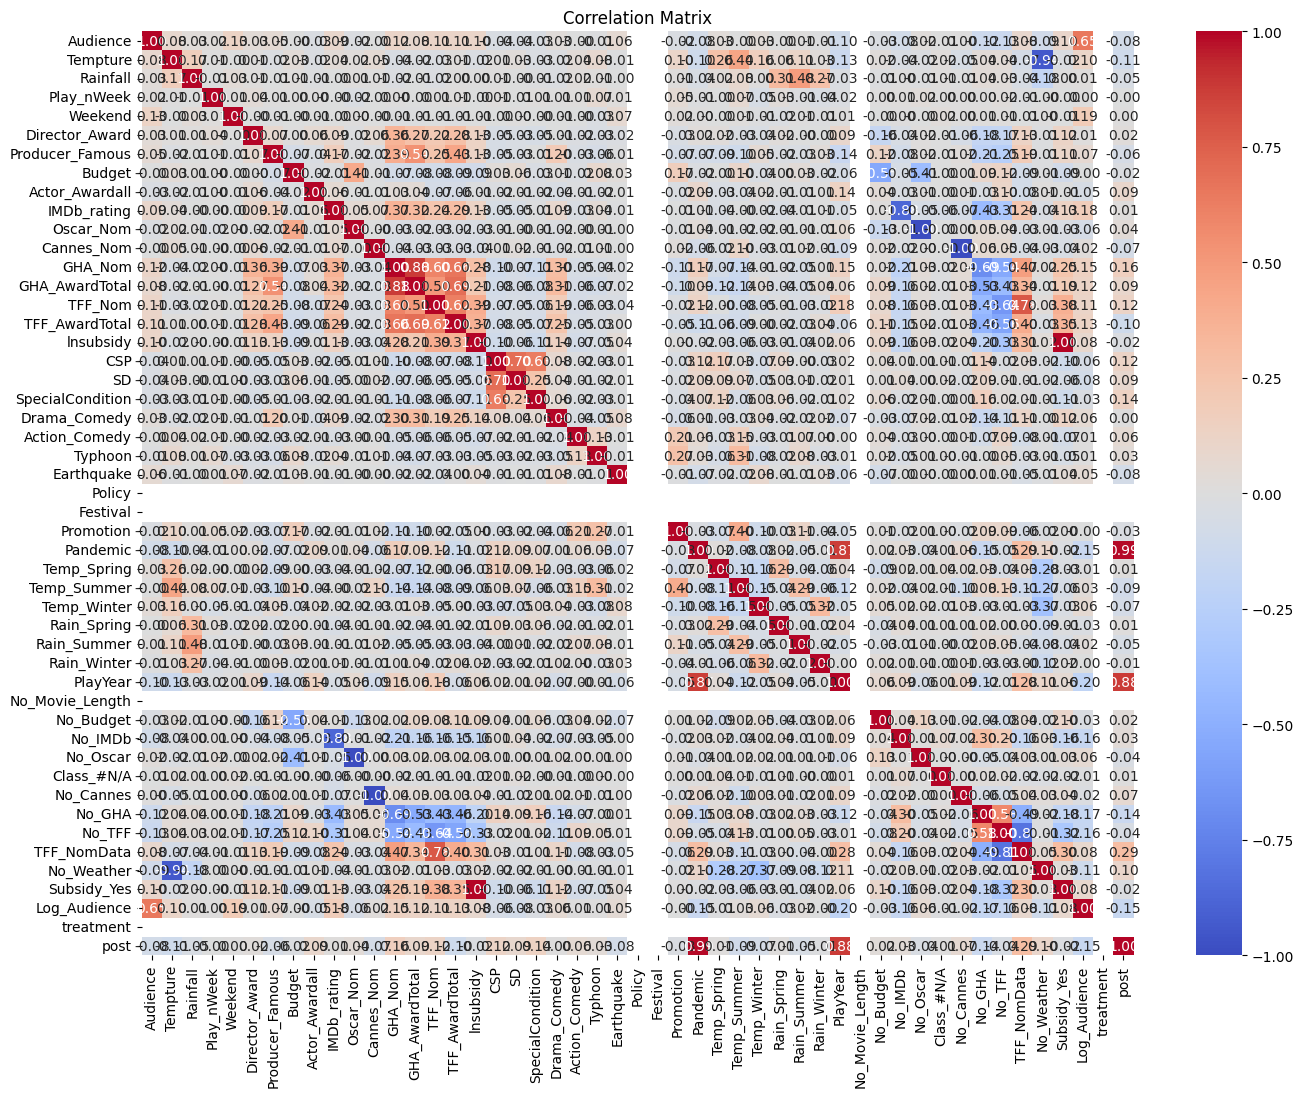

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算相關矩陣
corr_matrix = data.corr()

# 繪製熱圖
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 計算每個變數的VIF
X = data.drop(columns=['Log_Audience'])
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


             feature         VIF
0           Audience    1.073173
1           Tempture   22.103956
2           Rainfall    1.831933
3         Play_nWeek    1.025514
4            Weekend    1.023491
5     Director_Award    1.332760
6    Producer_Famous    1.690303
7             Budget    1.923247
8     Actor_Awardall    1.079346
9        IMDb_rating    6.486289
10         Oscar_Nom         inf
11        Cannes_Nom         inf
12           GHA_Nom    8.925970
13    GHA_AwardTotal    7.019214
14           TFF_Nom    4.849650
15    TFF_AwardTotal    3.456944
16         lnsubsidy  322.375018
17               CSP    4.491601
18                SD    2.389336
19  SpecialCondition    3.196510
20      Drama_Comedy    1.294715
21     Action_Comedy    1.165813
22           Typhoon    1.333753
23        Earthquake         NaN
24            Policy    0.000000
25          Festival         NaN
26         Promotion    1.378966
27          Pandemic   70.062804
28       Temp_Spring    1.595547
29       T

In [221]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 檢查現有的數據框架列
print("數據框架中的列: ", data.columns)

# 創建虛擬變數，如果這些變數不存在於數據框架中
required_columns = [
    'No_Movie_Length', 'No_Budget', 'No_IMDb', 'No_Oscar', 'Class_#N/A',
    'No_Cannes', 'No_GHA', 'No_TFF', 'TFF_NomData', 'No_Weather', 'Subsidy_Yes'
]

for col in required_columns:
    if col not in data.columns:
        data[col] = 0  # 假設缺少的變數設置為0，表示缺少該信息

# 添加這些變數到模型中
features = [
    'Tempture', 'Rainfall', 'Weekend', 'Director_Award', 'Producer_Famous',
    'Budget', 'Actor_Awardall', 'IMDb_rating', 'Oscar_Nom', 'Cannes_Nom', 
    'GHA_Nom', 'GHA_AwardTotal', 'TFF_Nom', 'TFF_AwardTotal', 'lnsubsidy', 
    'CSP', 'SD', 'SpecialCondition', 'Drama_Comedy', 'Action_Comedy', 
    'Typhoon', 'Earthquake', 'Policy', 'Festival', 'Promotion', 'Pandemic', 
    'Temp_Spring', 'Temp_Summer', 'Temp_Winter', 'Rain_Spring', 'Rain_Summer', 
    'Rain_Winter', 'PlayYear', 'No_Movie_Length', 'No_Budget', 'No_IMDb', 
    'No_Oscar', 'Class_#N/A', 'No_Cannes', 'No_GHA', 'No_TFF', 'TFF_NomData', 
    'No_Weather', 'Subsidy_Yes'
]

X = data[features]
y = data['Log_Audience']

# 添加常數項
X = sm.add_constant(X)

# 訓練OLS模型
model = sm.OLS(y, X).fit()

# 輸出模型結果
print(model.summary())


數據框架中的列:  Index(['Tempture', 'Rainfall', 'Play_nWeek', 'Weekend', 'Audience', 'lnbudget',
       'Director_Award', 'Producer_Famous', 'Actor_Awardall', 'IMDb_rating',
       'GHA_Nom', 'GHA_AwardTotal', 'TFF_Nom', 'TFF_AwardTotal', 'lnsubsidy',
       'CSP', 'SD', 'SpecialCondition', 'Drama_Comedy', 'Action_Comedy',
       'Typhoon', 'Earthquake', 'Policy', 'Festival', 'Promotion', 'Pandemic',
       'Temp_Spring', 'Temp_Summer', 'Temp_Winter', 'Rain_Spring',
       'Rain_Summer', 'Rain_Winter', 'PlayYear', 'No_Movie_Length',
       'No_Budget', 'No_IMDb', 'Class_NA', 'No_GHA', 'No_TFF', 'TFF_NomData',
       'No_Weather', 'Subsidy_Yes', 'Log_Audience', 'Subsidy_Yes:lnbudget',
       'Subsidy_Yes:lnsubsidy', 'No_Budget:lnbudget', 'No_IMDb:IMDb_rating',
       'No_GHA:GHA_Nom', 'No_GHA:GHA_AwardTotal', 'No_TFF:TFF_Nom',
       'No_TFF:TFF_AwardTotal'],
      dtype='object')


KeyError: "['Budget', 'Oscar_Nom', 'Cannes_Nom'] not in index"